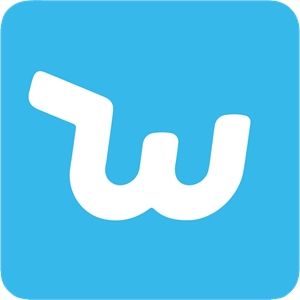

# Extracting the most useful data
*  the strcuture of the dataset have alot of columns and quiet small number of raws  I have to understand this data carefully so I will assess,clean this data , i will choose the most useful columns and i will ignore the remaining I want to extract the most usefull data to my model

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  Reading my dataset to my notebook

In [ ]:
df_products=pd.read_csv("../input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv")
df_products.head()

# Starting my assessment process 
1. visual assessment 
2. programmatic assessment
# #  visual assessment
I have used microsoft excel to visual assessment process 
currency_buyer , inventory_total , shipping_is_express ,theme and crawl_month columns has only one value I don't think that is useful for my model
urgency_text ,avis positifs has alot of missing data 
merchant_info_subtitle not well structued column becasue some values have avis positifs but another havn't 
product_url and product_picture are links so I think we can't extract useful information for my analysis 

# # Programmatic assessment

In [ ]:
df_products.columns

In [ ]:
df_products.info()

1-retail_price is int data type 
2-

In [ ]:
product_color=df_products['product_color'].value_counts()
print(product_color.to_string())

In [ ]:
#for index,item in df_products['product_color'].items() :
   # item=str(item).lower()

In [ ]:
df_products['product_color']=df_products['product_color'].str.lower()
print(df_products['product_color'].value_counts().to_string())

In [ ]:
df_products['product_color'].replace('grey','gray',inplace=True)

In [ ]:
df_products['product_color']=df_products['product_color'].str.split('&')
print(df_products['product_color'])

In [ ]:
df_products['product_color']=df_products['product_color'].str[0]

In [ ]:
print(df_products['product_color'].value_counts().to_string())

In [ ]:
df_products['product_color']=df_products['product_color'].str.split(' ')
df_products['product_color']=df_products['product_color'].str[0]
print(df_products['product_color'].value_counts().to_string())

In [ ]:
df_products['product_color']=df_products['product_color'].str.split('-')
df_products['product_color']=df_products['product_color'].str[0]
print(df_products['product_color'].value_counts().to_string())

In [ ]:
df_products['product_color'].replace({'applegreen':'green','blackwhite':'black',
                                     'lightgreen':'green','lightblue':'blue','navyblue':'blue',
                                     'denimblue':'blue','prussianblue':'blue','lakeblue':'blue',
                                     'darkblue':'blue','skyblue':'blue','lightblue':'blue'
                                     ,'navyblue':'blue','armygreen':'green','darkgreen':'green',
                                     'applegreen':'green','lightgreen':'green','mintgreen':'green',
                                      'winered':'red','coralred':'red','lightred':'red',
                                     'watermelonred':'red','fluorescentgreen':'green',
                                     'rosered':'rose','rosegold':'rose','greysnakeskinprint':'gray',
                                     'lightgray':'gray','lightgrey':'gray','whitefloral':'white'
                                     ,'whitestripe':'white','lightpink':'pink','dustypink':'pink',
                                     'lightkhaki':'khaki','lightpurple':'purple','lightyellow':'yellow',
                                     'tan':'brown','coffee':'brown','offwhite':'white',
                                     'offblack':'black','coolblack':'black','leopardprint':
                                     'leopard','claret':'red','violet':'blue','apricot':'pink',
                                     'nude':'pink','gold':'brown','ivory':'beige','burgundy':'red',
                                     'navy':'blue','wine':'red','camel':'brown','khaki':'brown','light':'white'},inplace=True)

![](http://)I Will change colors like floral ,leopard , army ,camouflage , silver ,star , khaki , rainbow ,jasper to multicolor to reduce the values 

In [ ]:
df_products['product_color'].replace({'floral':'multicolor','leopard':'multicolor',
                                     'army':'multicolor','camouflage':'multicolor',
                                     'silver':'multicolor','star':'multicolor',
                                     'khaki':'multicolor','rainbow':'multicolor',
                                     'jasper':'multicolor',} ,inplace=True)

In [ ]:
df_products['currency_buyer'].value_counts()

In [ ]:
print(df_products['product_color'].value_counts().to_string())

there are 1573 value are the same and no more category so this column will be useless for me so i will drop it 

In [ ]:
df_products.drop('currency_buyer',axis=1,inplace=True)

In [ ]:
df_products['merchant_id'].value_counts()

From result above there are 958 merchant in this dataset 15 times is the max selling  

df_products

In [ ]:
df_products[df_products.duplicated()]

In [ ]:
df_products.drop('merchant_title',axis=1,inplace=True)

In [ ]:
df_products.drop('merchant_name',axis=1,inplace=True)

In [ ]:
df_products['origin_country'].value_counts()

In [ ]:
df_products.drop('merchant_profile_picture',axis=1,inplace=True)

In [ ]:
df_products['crawl_month'].value_counts()

In [ ]:
df_products.drop('crawl_month',axis=1,inplace=True)

In [ ]:
df_products['urgency_text'].value_counts()

In [ ]:
df_products['urgency_text'].isnull().sum()

there are two reasones to drop this column </br>
1-nearby all the values are similar </br>
2-that column has 1100 values NaN </br>
so this won't be useful

In [ ]:
df_products.drop('urgency_text',axis=1,inplace=True)

In [ ]:
df_products.drop('merchant_info_subtitle',axis=1,inplace=True)

In [ ]:
df_products.drop('product_picture',axis=1,inplace=True)

In [ ]:
df_products.drop('product_url',axis=1,inplace=True)

In [ ]:
df_products['theme'].value_counts()

In [ ]:
df_products.drop('theme',axis=1,inplace=True)

In [ ]:
df_products.head()

In [ ]:
df_products.columns

I will see what is null values in the remaining columns 

In [ ]:
df_products.info()

has_urgency_banner has alot of missing data so i will drop it 

In [ ]:
df_products.drop('has_urgency_banner',axis=1,inplace=True)

In [ ]:
df_products['origin_country'][df_products['origin_country']=="NaN"]

In [ ]:
df_products['origin_country'].value_counts()

In [ ]:
mode=df_products['origin_country'].mode()
print(mode)
df_products['origin_country']=df_products['origin_country'].replace(np.nan,"CN")

In [ ]:
df_products['origin_country'].isnull().sum()

In [ ]:
df_products.info()

In [ ]:
mode=df_products['product_color'].mode()
print(mode)
df_products['product_color']=df_products['product_color'].replace(np.nan,"black")

In [ ]:
df_products['origin_country'].isnull().sum()

In [ ]:
df_products['product_id'].value_counts()

accutlly I have 1341 products so I want to know how many items sold for each product ?

In [ ]:
averagefeatur=df_products.groupby(df_products['product_id']).mean()[['price','retail_price','merchant_rating',
                                                                 'rating']]
averagefeatur

In [ ]:
df_products.to_csv("df_products.csv")

we just cleaned our data and we want to build first model to know 

There some problems in the data we will rediscover this issues

In [ ]:
df_products['diffrencebetprices']=df_products['retail_price']-df_products['price']

In [ ]:
df_products['diffrencebetprices'].loc[df_products['diffrencebetprices']<=0]

there are 752 product bought in price which less than or equal the original price so I think these prices not correct I can't fed this values in my model

In [ ]:
print(df_products['product_variation_size_id'].value_counts().to_string())

In [ ]:
df_products['product_variation_size_id']=df_products['product_variation_size_id'].str.lower()

In [ ]:
print(df_products['product_variation_size_id'].value_counts().to_string())

In [ ]:
df_products['product_variation_size_id'].replace({"s.":"s","size s":"s","size-s":"s","size s.":"s",
                                                "s(bust 88cm)":"s","suit-s":"s",
                                                "size--s":"s","size/s":"s","25-s":"s",
                                                "s(pink & black)":"s","us-s":"s",
                                                "pants-s":"s","s diameter 30cm":"s","s..":"s","s (waist58-62cm)":"s"
                                                , "s pink":"s","m.":"m","size m":"m","sizel":"l","32/l":"l"
                                                 ,"size-l":"l","x   l":"xl","xs.":"xs","size-xs":"xs","size xs":"xs"
                                                 ,"size-xxs":"xxs","size -xxs":"xxs","size xxs":"xxs"
                                                 ,"2xl":"xxl","xxxxxl":"5xl","size-5xl":"5xl","xxxxl":"4xl",
                                                 "xxxl":"3xl","size-4xl":"4xl","l.":"l",
                                                 "1 pc - xl":"xl","04-3xl":"3xl","size4xl":"4xl",
                                                  "us 6.5 (eu 37)":"m","us5.5-eu35":"s","26(waist 72cm 28inch)":
                                                  "3x","women size 36":"s","36":"s","women size 37":"m","eu 35":"s",
                                                  "3x":"3xl","eu39(us8)":"m","choose a size":"s",
                                                  "base & top & matte top coat":"s","4-5 years":"s",
                                                  "daughter 24m":"s","2":"s","5":"s",
                                                  "30 cm":"s","white":"s","round":"s","40 cm":"s","17":"l",
                                                  "60":"l","floating chair for kid":"s","au plug low quality":"s",
                                                  "baby float boat":"s","4":"xs","s/m(child)":"s","1pc":"s"
                                                  ,"3 layered anklet":"s","base coat":"s","20pcs-10pairs":"s",
                                                  "pack of 1":"s","100 x 100cm(39.3 x 39.3inch)":"s","b":"s",
                                                  "first  generation":"s","3x":"3xl","100 cm":"s","2pcs":"s",
                                                  "5pairs":"s","10pcs":"s","20pcs":"s","100pcs":"s",
                                                  "1m by 3m":"s","h01":"s","80 x 200 cm":"s","1":"xxxs",
                                                  "33":"xs","34":"xs","29":"4xl","25":"xxl","35":"s","1 pc.":"s",
                                                  "one size":"s","10 ml":"s"
                                                 },inplace=True)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x=df_products['product_variation_size_id'].value_counts().index
y=df_products['product_variation_size_id'].value_counts()
ax.bar(x, y, align='center')
ax.set_xticks(x)
ax.set_xlabel('Size')
ax.set_title('size counts')
plt.show()

we can see that in the graph above small sizes between l and xxs have the large values 

In [ ]:
df_products.to_csv("df_products.csv")

In [ ]:
df_products['shipping_option_name'].value_counts()

In [ ]:
standardshippinglist=["Livraison standard","Envio Padrão","Expediere Standard","Envío normal",
                     "الشحن القياسي","Standardversand","Standardowa wysyłka","Стандартная доставка",
                     "Standart Gönderi","Spedizione standard","การส่งสินค้ามาตรฐาน","ការដឹកជញ្ជូនតាមស្តង់ដារ"]

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Livraison standard", "buymentlang"] = "French"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "الشحن القياسي", "buymentlang"] = "Arabic"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Standard Shipping", "buymentlang"] = "English"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Envio Padrão", "buymentlang"] = "Portuguese"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Expediere Standard", "buymentlang"] = "Romanian"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Envío normal", "buymentlang"] = "Spanish"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Standardversand", "buymentlang"] = "German"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Livraison Express", "buymentlang"] = "French"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Standardowa wysyłka", "buymentlang"] = "Polish"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Стандартная доставка", "buymentlang"] = "Russian"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Standart Gönderi", "buymentlang"] = "Turkish"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Spedizione standard", "buymentlang"] = "Italian"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "การส่งสินค้ามาตรฐาน", "buymentlang"] = "Thailand"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "ការដឹកជញ្ជូនតាមស្តង់ដារ", "buymentlang"] = "Khmer"

In [ ]:
df_products.loc[df_products['shipping_option_name'] == "Ekspresowa wysyłka", "buymentlang"] = "Polish"

In [ ]:
df_products['buymentlang'].value_counts()

In [ ]:
df_products['buymentlang'].isnull().sum()

In [ ]:
#standardshippinglist
df_products['shipping_option_name'].replace(standardshippinglist,"Standard Shipping",inplace=True)

In [ ]:
df_products['shipping_option_name'].value_counts()

In [ ]:
Expresslist=["Livraison Express","Ekspresowa wysyłka"]

In [ ]:
df_products['shipping_option_name'].replace(Expresslist,"Express Shipping",inplace=True)

In [ ]:
df_products['shipping_option_price'].describe()

In [ ]:
fig, ax = plt.subplots()
x=df_products['shipping_option_price'].value_counts().index
y=df_products['shipping_option_price'].value_counts()
ax.bar(x, y, align='center')
ax.set_xticks(x)
ax.set_xlabel('price shipping')
ax.set_title('price shipping counts')
plt.show()

In [ ]:
df_products.loc[df_products['shipping_option_price']==12]['shipping_option_name']

In [ ]:
df_products.loc[df_products['shipping_option_price']==7]['shipping_option_name']

In [ ]:
df_products['countries_shipped_to'].value_counts()[:20]

In [ ]:
import seaborn as sns 
sns.countplot(df_products['countries_shipped_to'].value_counts()[:20])

In [ ]:
df_products["badge_local_product"].value_counts()

In [ ]:
df_products["badge_product_quality"].value_counts()

In [ ]:
df_products["badge_fast_shipping"].value_counts()

In [ ]:
df_products["inventory_total"].value_counts()

In [ ]:
df_products.to_csv("df_products.csv")

In [ ]:
df_products=pd.get_dummies(df_products,columns=['product_color','shipping_option_name','origin_country','buymentlang'])

In [ ]:
df_products.to_csv("df_products.csv")
print(x)

In [ ]:
from wordcloud import WordCloud
text=list(df_products['title'])
textcol=''
for a in text :
    textcol=textcol+a
wordcloudmodel=WordCloud().generate(textcol)
plt.imshow(wordcloudmodel,interpolation='bilinear')
#plt.axis("on")
plt.show()

In [ ]:
text=list(df_products['title'])
textcol=''
for a in text :
    textcol=textcol+a
wordcloudmodel=WordCloud().generate(textcol)
plt.imshow(wordcloudmodel,interpolation='bilinear')
plt.show()

In [ ]:
df_products['product_variation_size_id'].value_counts()

In [ ]:
#from sklearn import preprocessing 
#le =preprocessing.LabelEncoder()
#le.fit_transform(df_products['product_variation_size_id'].astype(str))
df_products=pd.get_dummies(df_products,columns=['product_variation_size_id'])

In [ ]:
df_products['rating']=df_products['rating'].apply(round)

In [ ]:
sns.barplot(df_products['rating'].value_counts().index,df_products['rating'].value_counts())

In [ ]:
df_products['merchant_rating']=df_products['merchant_rating'].apply(round)

In [ ]:
sns.barplot(df_products['merchant_rating'].value_counts().index ,df_products['merchant_rating'].value_counts())

In [ ]:
df_products['product_variation_inventory'].value_counts()

In [ ]:
df_products['inventory_total'].value_counts()

In [ ]:
df_products['units_sold'].value_counts()

In [ ]:
dropval=df_products.loc[df_products['units_sold']>60000]

In [ ]:
dropval.shape

In [ ]:
df_products=df_products.loc[df_products['units_sold']<=60000]

In [ ]:
#df_products.drop(df_products[df_products['units_sold']>60000].index,axis=0,inplace=True)#

In [ ]:
#print(,)

In [ ]:
df_products.columns

In [ ]:
X=[ 'price','uses_ad_boosts', 'rating', 'badges_count', 'badge_local_product','badge_product_quality',
   'badge_fast_shipping', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to','merchant_rating',
       'merchant_has_profile_picture',
       'product_color_beige', 'product_color_black', 'product_color_blue',
       'product_color_brown', 'product_color_gray', 'product_color_green',
       'product_color_multicolor', 'product_color_orange',
       'product_color_pink', 'product_color_purple', 'product_color_red',
       'product_color_rose', 'product_color_white', 'product_color_yellow',
       'shipping_option_name_Express Shipping',
       'shipping_option_name_Standard Shipping', 'origin_country_AT',
       'origin_country_CN', 'origin_country_GB', 'origin_country_SG',
       'origin_country_US', 'origin_country_VE', 'buymentlang_Arabic',
       'buymentlang_English', 'buymentlang_French', 'buymentlang_German',
       'buymentlang_Italian', 'buymentlang_Khmer', 'buymentlang_Polish',
       'buymentlang_Portuguese', 'buymentlang_Romanian', 'buymentlang_Russian',
       'buymentlang_Spanish', 'buymentlang_Thailand', 'buymentlang_Turkish',
       'product_variation_size_id_3x', 'product_variation_size_id_3xl',
       'product_variation_size_id_4xl', 'product_variation_size_id_5xl',
       'product_variation_size_id_6xl', 'product_variation_size_id_l',
       'product_variation_size_id_m', 'product_variation_size_id_s',
       'product_variation_size_id_xl', 'product_variation_size_id_xs',
       'product_variation_size_id_xxl', 'product_variation_size_id_xxs',
       'product_variation_size_id_xxxs'
       ]
X=df_products[X]
Y=df_products['units_sold']

In [ ]:
#X['product_variation_size_id']

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
X.to_csv("X.csv")

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
scaler = StandardScaler()
lin = LinearRegression()

In [ ]:
def modelfit(X,Y,scaler,modelalgorithm,train_test_split):
    #scaler.fit_transform(X,Y)
    normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
    scaler.fit_transform(X,Y)
    #scaler.fit_transform()
    X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=.2,random_state=42)
    modelalgorithm.fit(X_train,y_train)
    prediction =modelalgorithm.predict(X_test)
    #print(mean_absolute_error(y_test,prediction))
    return r2_score(y_test,prediction)

In [ ]:
modelfit(X,Y,scaler,lin,train_test_split)

In [ ]:
#accuracy=[]
#for i in range(X.shape[1]):
#    X_model=X.iloc[:,i:-1]
 ##   print("this model use all data without first",i,"columns")
  #  ac=modelfit(X_model,Y,scaler,lin,train_test_split)
  #  accuracy.append(ac)

In [ ]:
accuracy=[]
Start=[]
End=[]
maxac=modelfit(X.iloc[:,0:1],Y,scaler,lin,train_test_split)
index_i=0
index_j=0
for i in range(1,X.shape[1]):
    for j in range(1,X.shape[1]):
        if (i>j):
            X_model=X.iloc[:,j:i]
            print("this model use data start from",j,"column to",i ,"column")
            try :
                ac=modelfit(X_model,Y,scaler,lin,train_test_split)
                accuracy.append(ac)
                Start.append(j)
                End.append(i)
                if ac>=maxac:
                    maxac=ac
                    index_i=i
                    index_j=j
                print(ac)
            except ValueError :
                print("error")
            

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Start,End,accuracy)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
index_i

In [ ]:
index_j

In [ ]:
max(accuracy)

In [ ]:
min(accuracy)

In [ ]:
X_predict=X.iloc[:,49:59]
y_result=Y.iloc[:]
#print(X.iloc[25,7:12])
scaler.fit_transform(X_predict,Y)
X_train, X_test, y_train, y_test=train_test_split(X_predict,Y,test_size=.2,random_state=42)
lin.fit(X_train,y_train)
prediction =lin.predict(X.iloc[:,49:59])
#print(mean_absolute_error(y_test,prediction))
print(prediction,y_result)

In [ ]:
plt.plot(prediction)
plt.show()
plt.plot(y_result)
plt.show()

In [ ]:
prediction.mean()

In [ ]:
y_result.mean()

In [ ]:
col=[]
accuracy=[]
for j in range(1,X.shape[1]):
    X_model=X.iloc[:,j:j+1]
    print("this model use data start from",j,"column to")
    ac=modelfit(X_model,Y,scaler,lin,train_test_split)
    print(ac)
    accuracy.append(ac)
    col.append(j)

In [ ]:
plt.plot(col,accuracy)
plt.show()